In [1]:
using Pkg
Pkg.activate(".")
#Pkg.instantiate()

  Activating project at `~/Documents/UCL/3x2_analytical`


In [2]:
using LinearAlgebra
using LimberJack
using CSV
using YAML
using JLD2
using PythonCall
using DataFrames
using NPZ
using Plots
using Interpolations
using Statistics
sacc = pyimport("sacc");

[ Info: Precompiling LimberJack [6b86205d-155a-4b14-b82d-b6a149ea78f2] (cache misses: wrong dep version loaded (2), mismatched flags (16))
[ Info: Precompiling YAML [ddb6d928-2868-570f-bddf-ab3f9cf99eb6] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c] (cache misses: wrong dep version loaded (2))
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: wrong dep version loaded (2))


In [3]:
function nz_interpolate(z, nz, res; mode="linear")
    if mode!="none"
        if mode=="linear"
            nz_int = linear_interpolation(z, nz;
                extrapolation_bc=Line())
        end
        if mode=="cubic"
            dz = mean(z[2:end] - z[1:end-1])
            z_range = z[1]:dz:z[end]
            nz_int = cubic_spline_interpolation(z_range, nz;
                extrapolation_bc=Line())
        end
        zz_range = range(0.00001, stop=z[end], length=res)
        nzz = nz_int(zz_range)
        return zz_range, nzz
    else
        return z, nz
    end
end

nz_interpolate (generic function with 1 method)

In [4]:
method = "bpz"
sacc_path = "data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc"
yaml_path = "data/CosmoDC2/gcgc.yml"
nz_path = string("data/CosmoDC2/image_nzs_", method, "_priors/")

sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)

nz_lens_0 = npzread(string(nz_path, "nz_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "nz_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "nz_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "nz_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "nz_lens_4.npz"))
zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]

zs_k0, nz_k0 = nz_interpolate(zs_k0, nz_k0, 1000; mode="cubic")
zs_k1, nz_k1 = nz_interpolate(zs_k1, nz_k1, 1000; mode="cubic")
zs_k2, nz_k2 = nz_interpolate(zs_k2, nz_k2, 1000; mode="cubic")
zs_k3, nz_k3 = nz_interpolate(zs_k3, nz_k3, 1000; mode="cubic")
zs_k4, nz_k4 = nz_interpolate(zs_k4, nz_k4, 1000; mode="cubic")

nz_lens_0 = Dict("z"=>zs_k0, "dndz"=>nz_k0)
nz_lens_1 = Dict("z"=>zs_k1, "dndz"=>nz_k1)
nz_lens_2 = Dict("z"=>zs_k2, "dndz"=>nz_k2)
nz_lens_3 = Dict("z"=>zs_k3, "dndz"=>nz_k3)
nz_lens_4 = Dict("z"=>zs_k4, "dndz"=>nz_k4)

meta_gcgc, files_gcgc = make_data(sacc_file, yaml_file;
                        nz_lens_0=nz_lens_0,
                        nz_lens_1=nz_lens_1,
                        nz_lens_2=nz_lens_2,
                        nz_lens_3=nz_lens_3,
                        nz_lens_4=nz_lens_4)

meta_gcgc.types = [ 
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density"]


lens_0 lens_0 6
lens_1 lens_1 7
lens_2 lens_2 8
lens_3 lens_3 9
lens_4 lens_4 9
using custom nz for nz_lens_0
using custom nz for nz_lens_1
using custom nz for nz_lens_2
using custom nz for nz_lens_3
using custom nz for nz_lens_4


5-element Vector{String}:
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"

In [5]:
method = "bpz"
sacc_path = "data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc"
yaml_path = "data/CosmoDC2/wlwl.yml"
nz_path = string("data/CosmoDC2/image_nzs_", method, "_priors/")
fake_data_path = string("data/CosmoDC2/CosmoDC2_wlwl_theory_photo_", method, "_best.csv")

fake_data = CSV.read(fake_data_path, DataFrame)
fake_data = fake_data.theory[1:end-1]

sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)

nz_source_0 = npzread(string(nz_path, "nz_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "nz_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "nz_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "nz_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "nz_source_4.npz"))

zs_k0, nz_k0 = nz_source_0["z"], nz_source_0["dndz"]
zs_k1, nz_k1 = nz_source_1["z"], nz_source_1["dndz"]
zs_k2, nz_k2 = nz_source_2["z"], nz_source_2["dndz"]
zs_k3, nz_k3 = nz_source_3["z"], nz_source_3["dndz"]
zs_k4, nz_k4 = nz_source_4["z"], nz_source_4["dndz"]

zs_k0, nz_k0 = nz_interpolate(zs_k0, nz_k0, 1000; mode="cubic")
zs_k1, nz_k1 = nz_interpolate(zs_k1, nz_k1, 1000; mode="cubic")
zs_k2, nz_k2 = nz_interpolate(zs_k2, nz_k2, 1000; mode="cubic")
zs_k3, nz_k3 = nz_interpolate(zs_k3, nz_k3, 1000; mode="cubic")
zs_k4, nz_k4 = nz_interpolate(zs_k4, nz_k4, 1000; mode="cubic")

nz_source_0 = Dict("z"=>zs_k0, "dndz"=>nz_k0)
nz_source_1 = Dict("z"=>zs_k1, "dndz"=>nz_k1)
nz_source_2 = Dict("z"=>zs_k2, "dndz"=>nz_k2)
nz_source_3 = Dict("z"=>zs_k3, "dndz"=>nz_k3)
nz_source_4 = Dict("z"=>zs_k4, "dndz"=>nz_k4)

meta_wlwl, files_wlwl = make_data(sacc_file, yaml_file;
                        nz_source_0=nz_source_0,
                        nz_source_1=nz_source_1,
                        nz_source_2=nz_source_2,
                        nz_source_3=nz_source_3,
                        nz_source_4=nz_source_4)

meta_wlwl.types = [
    "galaxy_shear", 
    "galaxy_shear", 
    "galaxy_shear",
    "galaxy_shear",
    "galaxy_shear"]

source_0 source_0 13
source_1 source_0 13
source_1 source_1 13
source_2 source_0 13
source_2 source_1 13
source_2 source_2 13
source_3 source_0 13
source_3 source_1 13
source_3 source_2 13
source_3 source_3 13
source_4 source_0 13
source_4 source_1 13
source_4 source_2 13
source_4 source_3 13
source_4 source_4 13
using custom nz for nz_source_0
using custom nz for nz_source_1
using custom nz for nz_source_2
using custom nz for nz_source_3
using custom nz for nz_source_4


5-element Vector{String}:
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"

In [6]:
method = "bpz"
sacc_path = "data/CosmoDC2/summary_statistics_fourier_tjpcov.sacc"
yaml_path = "data/CosmoDC2/gcgc_gcwl_wlwl.yml"
nz_path = string("data/CosmoDC2/image_nzs_", method, "_priors/")

sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)

nz_lens_0 = npzread(string(nz_path, "nz_lens_0.npz"))
nz_lens_1 = npzread(string(nz_path, "nz_lens_1.npz"))
nz_lens_2 = npzread(string(nz_path, "nz_lens_2.npz"))
nz_lens_3 = npzread(string(nz_path, "nz_lens_3.npz"))
nz_lens_4 = npzread(string(nz_path, "nz_lens_4.npz"))
nz_source_0 = npzread(string(nz_path, "nz_source_0.npz"))
nz_source_1 = npzread(string(nz_path, "nz_source_1.npz"))
nz_source_2 = npzread(string(nz_path, "nz_source_2.npz"))
nz_source_3 = npzread(string(nz_path, "nz_source_3.npz"))
nz_source_4 = npzread(string(nz_path, "nz_source_4.npz"))
zs_k0, nz_k0 = nz_lens_0["z"], nz_lens_0["dndz"]
zs_k1, nz_k1 = nz_lens_1["z"], nz_lens_1["dndz"]
zs_k2, nz_k2 = nz_lens_2["z"], nz_lens_2["dndz"]
zs_k3, nz_k3 = nz_lens_3["z"], nz_lens_3["dndz"]
zs_k4, nz_k4 = nz_lens_4["z"], nz_lens_4["dndz"]
zs_k5, nz_k5 = nz_source_0["z"], nz_source_0["dndz"]
zs_k6, nz_k6 = nz_source_1["z"], nz_source_1["dndz"]
zs_k7, nz_k7 = nz_source_2["z"], nz_source_2["dndz"]
zs_k8, nz_k8 = nz_source_3["z"], nz_source_3["dndz"]
zs_k9, nz_k9 = nz_source_4["z"], nz_source_4["dndz"]

zs_k0, nz_k0 = nz_interpolate(zs_k0, nz_k0, 1000; mode="cubic")
zs_k1, nz_k1 = nz_interpolate(zs_k1, nz_k1, 1000; mode="cubic")
zs_k2, nz_k2 = nz_interpolate(zs_k2, nz_k2, 1000; mode="cubic")
zs_k3, nz_k3 = nz_interpolate(zs_k3, nz_k3, 1000; mode="cubic")
zs_k4, nz_k4 = nz_interpolate(zs_k4, nz_k4, 1000; mode="cubic")
zs_k5, nz_k5 = nz_interpolate(zs_k5, nz_k5, 1000; mode="cubic")
zs_k6, nz_k6 = nz_interpolate(zs_k6, nz_k6, 1000; mode="cubic")
zs_k7, nz_k7 = nz_interpolate(zs_k7, nz_k7, 1000; mode="cubic")
zs_k8, nz_k8 = nz_interpolate(zs_k8, nz_k8, 1000; mode="cubic")
zs_k9, nz_k9 = nz_interpolate(zs_k9, nz_k9, 1000; mode="cubic")

nz_lens_0 = Dict("z"=>zs_k0, "dndz"=>nz_k0)
nz_lens_1 = Dict("z"=>zs_k1, "dndz"=>nz_k1)
nz_lens_2 = Dict("z"=>zs_k2, "dndz"=>nz_k2)
nz_lens_3 = Dict("z"=>zs_k3, "dndz"=>nz_k3)
nz_lens_4 = Dict("z"=>zs_k4, "dndz"=>nz_k4)
nz_source_0 = Dict("z"=>zs_k5, "dndz"=>nz_k5)
nz_source_1 = Dict("z"=>zs_k6, "dndz"=>nz_k6)
nz_source_2 = Dict("z"=>zs_k7, "dndz"=>nz_k7)
nz_source_3 = Dict("z"=>zs_k8, "dndz"=>nz_k8)
nz_source_4 = Dict("z"=>zs_k9, "dndz"=>nz_k9)

mu_k0 = sum(zs_k0 .* nz_k0) / sum(nz_k0)
mu_k1 = sum(zs_k1 .* nz_k1) / sum(nz_k1)
mu_k2 = sum(zs_k2 .* nz_k2) / sum(nz_k2)
mu_k3 = sum(zs_k3 .* nz_k3) / sum(nz_k3)
mu_k4 = sum(zs_k4 .* nz_k4) / sum(nz_k4)
mu_k5 = sum(zs_k5 .* nz_k5) / sum(nz_k5)
mu_k6 = sum(zs_k6 .* nz_k6) / sum(nz_k6)
mu_k7 = sum(zs_k7 .* nz_k7) / sum(nz_k7)
mu_k8 = sum(zs_k8 .* nz_k8) / sum(nz_k8)
mu_k9 = sum(zs_k9 .* nz_k9) / sum(nz_k9)

meta_3x2, files_3x2 = make_data(sacc_file, yaml_file;
                        nz_lens_0=nz_lens_0,
                        nz_lens_1=nz_lens_1,
                        nz_lens_2=nz_lens_2,
                        nz_lens_3=nz_lens_3,
                        nz_lens_4=nz_lens_4,
                        nz_source_0=nz_source_0,
                        nz_source_1=nz_source_1,
                        nz_source_2=nz_source_2,
                        nz_source_3=nz_source_3,
                        nz_source_4=nz_source_4)

meta_3x2.types = [ 
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_density",
    "galaxy_shear", 
    "galaxy_shear", 
    "galaxy_shear",
    "galaxy_shear",
    "galaxy_shear"]

lens_0 lens_0 6
lens_1 lens_1 7
lens_2 lens_2 8
lens_3 lens_3 9
lens_4 lens_4 9
source_0 lens_0 6
source_0 lens_1 7
source_0 lens_2 8
source_0 lens_3 9
source_0 lens_4 9
source_1 lens_0 8
source_1 lens_1 7
source_1 lens_2 8
source_1 lens_3 9
source_1 lens_4 9
source_2 lens_0 8
source_2 lens_1 7
source_2 lens_2 8
source_2 lens_3 9
source_2 lens_4 9
source_3 lens_0 8
source_3 lens_1 7
source_3 lens_2 8
source_3 lens_3 9
source_3 lens_4 9
source_4 lens_0 8
source_4 lens_1 7
source_4 lens_2 8
source_4 lens_3 9
source_4 lens_4 9
source_0 source_0 13
source_1 source_0 13
source_1 source_1 13
source_2 source_0 13
source_2 source_1 13
source_2 source_2 13
source_3 source_0 13
source_3 source_1 13
source_3 source_2 13
source_3 source_3 13
source_4 source_0 13
source_4 source_1 13
source_4 source_2 13
source_4 source_3 13
source_4 source_4 13
using custom nz for nz_source_0
using custom nz for nz_source_1
using custom nz for nz_source_2
using custom nz for nz_source_3
using custom nz for nz_sour

10-element Vector{String}:
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_density"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"
 "galaxy_shear"

### Make Data

In [42]:
function model_gcgc(;
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    dzs_lens=zeros(5), dzs_source=zeros(5), 
    wzs_lens=ones(5), wzs_source=ones(5),
    A_IA=0.25179439,
    meta=meta_gcgc, files=files_gcgc,
    data=nothing)

    lens_0_zs   = @.((zs_k0-mu_k0)/wzs_lens[1] + mu_k0 + dzs_lens[1])
    lens_1_zs   = @.((zs_k1-mu_k1)/wzs_lens[2] + mu_k1 + dzs_lens[2])
    lens_2_zs   = @.((zs_k2-mu_k2)/wzs_lens[3] + mu_k2 + dzs_lens[3])
    lens_3_zs   = @.((zs_k3-mu_k3)/wzs_lens[4] + mu_k3 + dzs_lens[4])
    lens_4_zs   = @.((zs_k4-mu_k4)/wzs_lens[5] + mu_k4 + dzs_lens[5])
    source_0_zs = @.((zs_k5-mu_k5)/wzs_source[1] + mu_k5 + dzs_source[1])
    source_1_zs = @.((zs_k6-mu_k6)/wzs_source[2] + mu_k6 + dzs_source[2])
    source_2_zs = @.((zs_k7-mu_k7)/wzs_source[3] + mu_k7 + dzs_source[3])
    source_3_zs = @.((zs_k8-mu_k8)/wzs_source[4] + mu_k8 + dzs_source[4])
    source_4_zs = @.((zs_k9-mu_k9)/wzs_source[5] + mu_k9 + dzs_source[5])

    nuisances = Dict(
    "lens_1_b"    => lens_1_b,
    "lens_2_b"    => lens_2_b,
    "lens_3_b"    => lens_3_b,
    "lens_4_b"    => lens_4_b,
    "lens_5_b"    => lens_5_b,
    "lens_0_zs"   => lens_0_zs,
    "lens_1_zs"   => lens_1_zs,
    "lens_2_zs"   => lens_2_zs,
    "lens_3_zs"   => lens_3_zs,
    "lens_4_zs"   => lens_4_zs,
    "source_0_zs" => source_0_zs,
    "source_1_zs" => source_1_zs,
    "source_2_zs" => source_2_zs,
    "source_3_zs" => source_3_zs,
    "source_4_zs" => source_4_zs,
    "A_IA"        => A_IA)

    cosmology = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    theory = Theory(cosmology, meta, files; 
        Nuisances=nuisances)
    if data == nothing
        data = meta.data
    end
    d = theory .- data
    xi2 = d'*meta.inv_cov*d
    return theory, xi2
end

function model_wlwl(;
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    dzs_lens=zeros(5), dzs_source=zeros(5), 
    wzs_lens=ones(5), wzs_source=ones(5),
    A_IA=0.25179439,
    meta=meta_wlwl, files=files_wlwl,
    data=nothing)

    lens_0_zs   = @.((zs_k0-mu_k0)/wzs_lens[1] + mu_k0 + dzs_lens[1])
    lens_1_zs   = @.((zs_k1-mu_k1)/wzs_lens[2] + mu_k1 + dzs_lens[2])
    lens_2_zs   = @.((zs_k2-mu_k2)/wzs_lens[3] + mu_k2 + dzs_lens[3])
    lens_3_zs   = @.((zs_k3-mu_k3)/wzs_lens[4] + mu_k3 + dzs_lens[4])
    lens_4_zs   = @.((zs_k4-mu_k4)/wzs_lens[5] + mu_k4 + dzs_lens[5])
    source_0_zs = @.((zs_k5-mu_k5)/wzs_source[1] + mu_k5 + dzs_source[1])
    source_1_zs = @.((zs_k6-mu_k6)/wzs_source[2] + mu_k6 + dzs_source[2])
    source_2_zs = @.((zs_k7-mu_k7)/wzs_source[3] + mu_k7 + dzs_source[3])
    source_3_zs = @.((zs_k8-mu_k8)/wzs_source[4] + mu_k8 + dzs_source[4])
    source_4_zs = @.((zs_k9-mu_k9)/wzs_source[5] + mu_k9 + dzs_source[5])

    nuisances = Dict(
    "lens_1_b"    => lens_1_b,
    "lens_2_b"    => lens_2_b,
    "lens_3_b"    => lens_3_b,
    "lens_4_b"    => lens_4_b,
    "lens_5_b"    => lens_5_b,
    "lens_0_zs"   => lens_0_zs,
    "lens_1_zs"   => lens_1_zs,
    "lens_2_zs"   => lens_2_zs,
    "lens_3_zs"   => lens_3_zs,
    "lens_4_zs"   => lens_4_zs,
    "source_0_zs" => source_0_zs,
    "source_1_zs" => source_1_zs,
    "source_2_zs" => source_2_zs,
    "source_3_zs" => source_3_zs,
    "source_4_zs" => source_4_zs,
    "A_IA"        => A_IA)
    
    cosmology = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    theory = Theory(cosmology, meta, files; 
        Nuisances=nuisances)
    if data == nothing
        data = meta.data
    end
    d = theory .- data
    xi2 = d'*meta.inv_cov*d
    return theory, xi2
end

function model_3x2(;
    Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
    lens_1_b=0.879118, lens_2_b=1.05894, lens_3_b=1.22145, lens_4_b=1.35065, lens_5_b=1.58909,
    dzs_lens=zeros(5), dzs_source=zeros(5), 
    wzs_lens=ones(5), wzs_source=ones(5),
    A_IA=0.25179439,
    meta=meta_3x2, files=files_3x2,
    data=nothing)

    lens_0_zs   = @.((zs_k0-mu_k0)/wzs_lens[1] + mu_k0 + dzs_lens[1])
    lens_1_zs   = @.((zs_k1-mu_k1)/wzs_lens[2] + mu_k1 + dzs_lens[2])
    lens_2_zs   = @.((zs_k2-mu_k2)/wzs_lens[3] + mu_k2 + dzs_lens[3])
    lens_3_zs   = @.((zs_k3-mu_k3)/wzs_lens[4] + mu_k3 + dzs_lens[4])
    lens_4_zs   = @.((zs_k4-mu_k4)/wzs_lens[5] + mu_k4 + dzs_lens[5])
    source_0_zs = @.((zs_k5-mu_k5)/wzs_source[1] + mu_k5 + dzs_source[1])
    source_1_zs = @.((zs_k6-mu_k6)/wzs_source[2] + mu_k6 + dzs_source[2])
    source_2_zs = @.((zs_k7-mu_k7)/wzs_source[3] + mu_k7 + dzs_source[3])
    source_3_zs = @.((zs_k8-mu_k8)/wzs_source[4] + mu_k8 + dzs_source[4])
    source_4_zs = @.((zs_k9-mu_k9)/wzs_source[5] + mu_k9 + dzs_source[5])

    nuisances = Dict(
    "lens_1_b"    => lens_1_b,
    "lens_2_b"    => lens_2_b,
    "lens_3_b"    => lens_3_b,
    "lens_4_b"    => lens_4_b,
    "lens_5_b"    => lens_5_b,
    "lens_0_zs"   => lens_0_zs,
    "lens_1_zs"   => lens_1_zs,
    "lens_2_zs"   => lens_2_zs,
    "lens_3_zs"   => lens_3_zs,
    "lens_4_zs"   => lens_4_zs,
    "source_0_zs" => source_0_zs,
    "source_1_zs" => source_1_zs,
    "source_2_zs" => source_2_zs,
    "source_3_zs" => source_3_zs,
    "source_4_zs" => source_4_zs,
    "A_IA"        => A_IA)

    cosmology = Cosmology(Ωm=Ωm, Ωb=Ωb, h=h, ns=ns, σ8=σ8,
        tk_mode=:EisHu,
        pk_mode=:Halofit)

    theory = Theory(cosmology, meta, files; 
        Nuisances=nuisances)
    if data == nothing
        data = meta.data
    end
    d = theory .- data
    xi2 = d'*meta.inv_cov*d
    return theory, xi2
end

model_3x2 (generic function with 1 method)

In [43]:
t_wlwl, Xi2_wlwl = model_wlwl()
t_gcgc, Xi2_gcgc = model_gcgc()
t_3x2, Xi2_3x2 = model_3x2()
println("Xi2_wlwl = ", Xi2_wlwl/length(meta_wlwl.data), " ", Xi2_wlwl)
println("Xi2_gcgc = ", Xi2_gcgc/length(meta_gcgc.data), " ", Xi2_gcgc)
println("Xi2_3x2 = ", Xi2_3x2/length(meta_3x2.data), " ", Xi2_3x2)

Xi2_wlwl = 0.9707568533263292 189.2975863986342
Xi2_gcgc = 5.845201540844455 227.96286009293374
Xi2_3x2 = 1.3977217627812266 610.804410335396


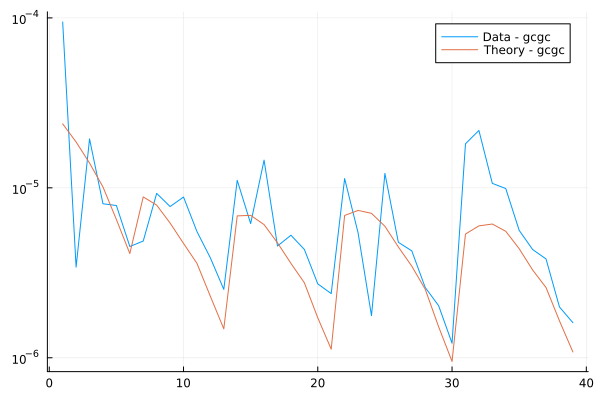

In [44]:
plot(meta_gcgc.data, yscale=:log10, label="Data - gcgc")
plot!(t_gcgc, label="Theory - gcgc")

In [45]:
npzwrite("data/CosmoDC2/theories.npz", 
    t_wlwl=t_wlwl,
    t_gcgc=t_gcgc,
    t_3x2=t_3x2)

In [46]:
A_IAs = Vector(range(-1.0, 1.0, length=200))

200-element Vector{Float64}:
 -1.0
 -0.9899497487437185
 -0.9798994974874372
 -0.9698492462311558
 -0.9597989949748744
 -0.949748743718593
 -0.9396984924623115
 -0.9296482412060302
 -0.9195979899497487
 -0.9095477386934674
 -0.8994974874371859
 -0.8894472361809045
 -0.8793969849246231
  ⋮
  0.8894472361809045
  0.8994974874371859
  0.9095477386934674
  0.9195979899497487
  0.9296482412060302
  0.9396984924623115
  0.949748743718593
  0.9597989949748744
  0.9698492462311558
  0.9798994974874372
  0.9899497487437185
  1.0

In [47]:
A_IAs = range(-1.0, 1.0, length=200)
IA_xi2_3x2 = [model_3x2(A_IA=A_IA, data=t_3x2)[2] for A_IA in A_IAs]
IA_xi2_wlwl = [model_wlwl(A_IA=A_IA, data=t_wlwl)[2] for A_IA in A_IAs]

200-element Vector{Float64}:
 60.486585827247985
 59.48985673884366
 58.501973542322006
 57.5229197731897
 56.5526790475635
 55.59123506216976
 54.63857159434494
 53.69467250203522
 52.75952172379668
 51.83310327879537
 50.915401266806995
 50.00639986821729
 49.10608334402184
  ⋮
 14.714140767828813
 15.178878026391025
 15.650782812352277
 16.129853815874355
 16.616089807728983
 17.10948963929761
 17.610052242571687
 18.117776630152463
 18.632661895251033
 19.15470721168849
 19.683911833895596
 20.220275096913156

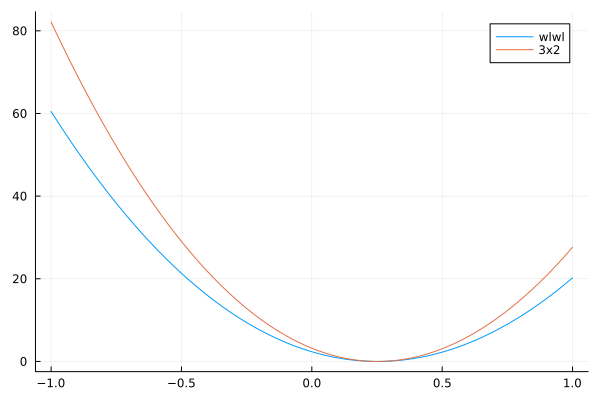

In [48]:
plot(A_IAs, IA_xi2_wlwl, label="wlwl")
plot!(A_IAs, IA_xi2_3x2, label="3x2")

In [11]:
dzs = zeros(5)
wzs = ones(5)
es = LinRange(-0.2, 0.2, 200)
dzs_xi2_3x2 = [model_3x2(dzs_lens=dzs .+ e, dzs_source=dzs .+ e, data=t_3x2)[2] for e in es]
dzs_xi2_gcgc = [model_gcgc(dzs_lens=dzs .+ e, data=t_gcgc)[2] for e in es]
dzs_xi2_wlwl = [model_wlwl(dzs_source=dzs .+ e, data=t_wlwl)[2] for e in es]

200-element Vector{Float64}:
 358.8097930661077
 352.7907596461223
 347.17807794017176
 341.5837410440789
 335.639777429776
 330.08955677129654
 324.55915731139055
 318.6951181317181
 313.2119050392039
 307.7500649038758
 301.9710409092447
 296.559620912476
 291.1711970583991
   ⋮
 481.402910851312
 492.15704499174365
 503.02114904873054
 513.9876729268734
 525.0438593809566
 536.2126435418904
 547.4721230431239
 558.8253801675129
 570.2895134350474
 581.8345650660262
 593.47861593518
 605.2280190851246

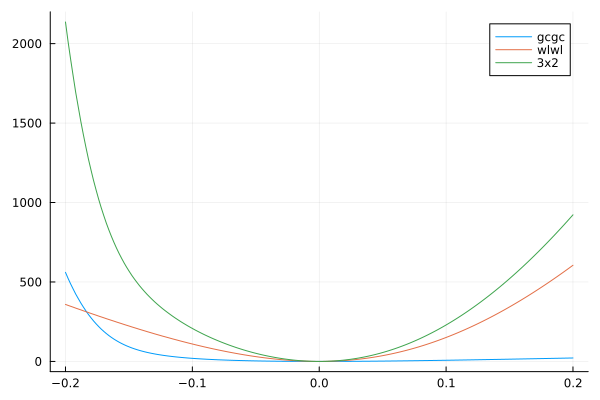

In [12]:
plot(es, dzs_xi2_gcgc, label="gcgc")
plot!(es, dzs_xi2_wlwl, label="wlwl")
plot!(es, dzs_xi2_3x2, label="3x2")

In [13]:
wzs_xi2_3x2 = [model_3x2(wzs_lens=wzs .+ e, wzs_source=wzs .+ e, data=t_3x2)[2] for e in es]
wzs_xi2_gcgc = [model_gcgc(wzs_lens=wzs .+ e, data=t_gcgc)[2] for e in es]
wzs_xi2_wlwl = [model_wlwl(wzs_source=wzs .+ e, data=t_wlwl)[2] for e in es]

200-element Vector{Float64}:
 2.557675010978654
 2.4797728577734053
 2.357605012757005
 2.2852526196727054
 2.1724322229306656
 2.149424241371851
 2.078678423969449
 1.9781524968167303
 1.915784554929957
 1.8190631698124686
 1.7622481626858624
 1.7375110111845946
 1.6513263928243855
 ⋮
 0.8608662795398581
 0.8702418025344302
 0.8795248818197903
 0.8887410292603252
 0.8977778798329072
 0.90671195872638
 0.9156028825148433
 0.9243416333837617
 0.9329768420941802
 0.941576435818815
 0.9501003717067141
 0.9585077336273994

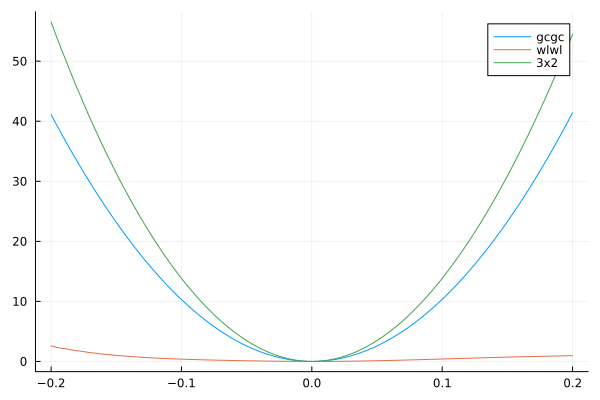

In [14]:
plot(es, wzs_xi2_gcgc, label="gcgc")
plot!(es, wzs_xi2_wlwl, label="wlwl")
plot!(es, wzs_xi2_3x2, label="3x2")

In [15]:
#using ForwardDiff
#function grad_h(h)
#    function f(h)
#        t, Xi2 = model_3x2(;Ωm=0.27347, σ8=0.779007, Ωb=0.04217, h=h, ns=0.99651,
#            meta=meta_3x2, files=files_3x2, data=t_3x2)
#        return Xi2
#    end
#    return ForwardDiff.derivative(f, h)
#end

#function grad_Wm(Wm)
#    function f(Wm)
#        t, Xi2 = model_3x2(;Ωm=Wm, σ8=0.779007, Ωb=0.04217, h=0.71899, ns=0.99651,
#            meta=meta_3x2, files=files_3x2, data=t_3x2)
#        return Xi2
#    end
#    return ForwardDiff.derivative(f, Wm)
#end

In [16]:
Wm = range(0.2, 0.5, length=200)
h = range(0.6, 0.9, length=200)
Wb = range(0.03, 0.07, length=200)

0.03:0.00020100502512562814:0.07

In [17]:
#h_grads = [grad_h(h_i) for h_i in h]
h_xi2_3x2 = [model_3x2(;h=h_i, data=t_3x2)[2] for h_i in h]
h_xi2_gcgc = [model_gcgc(;h=h_i, data=t_gcgc)[2] for h_i in h]
h_xi2_wlwl = [model_wlwl(;h=h_i, data=t_wlwl)[2] for h_i in h]

200-element Vector{Float64}:
 3.0830843169899094
 2.997349261035637
 2.91305248013599
 2.830166745369149
 2.748693780528686
 2.668622785755116
 2.5899276775877067
 2.512629313142796
 2.4366887691513797
 2.3621304316493843
 2.288916865296633
 2.2170413061559295
 2.146501858733799
 ⋮
 3.630468940272497
 3.688484955351299
 3.746814867347943
 3.805447031302074
 3.86439945754346
 3.923656287753955
 3.9832102461813585
 4.04306290024816
 4.103218344462269
 4.1636758925024475
 4.224400125106686
 4.285422641724761

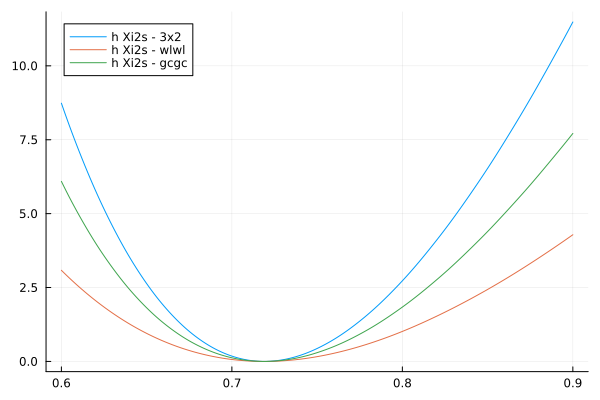

In [18]:
plot(h, h_xi2_3x2, label="h Xi2s - 3x2")
plot!(h, h_xi2_wlwl, label="h Xi2s - wlwl")
plot!(h, h_xi2_gcgc, label="h Xi2s - gcgc")

In [19]:
#Wm_grads = [grad_Wm(Wm_i) for Wm_i in Wm]
Wm_xi2_3x2 = [model_3x2(;Ωm=Wm_i, data=t_3x2)[2] for Wm_i in Wm]
Wm_xi2_gcgc = [model_gcgc(;Ωm=Wm_i, data=t_gcgc)[2] for Wm_i in Wm]
Wm_xi2_wlwl = [model_wlwl(;Ωm=Wm_i, data=t_wlwl)[2] for Wm_i in Wm]

200-element Vector{Float64}:
  316.168593890623
  304.29638392561213
  292.60720204076637
  281.1039165301696
  269.7893874691356
  258.6665403772733
  247.7382350842552
  237.00725377102177
  226.4764652391895
  216.14866092745055
  206.0266888074097
  196.11331852515428
  186.41133769961303
    ⋮
 3664.7592578560084
 3721.445004001339
 3778.6090111645444
 3836.2527505658013
 3894.376851998131
 3952.9819861234564
 4012.0695970235483
 4071.6402322860004
 4131.695315272193
 4192.235256259177
 4253.261742892924
 4314.775569989096

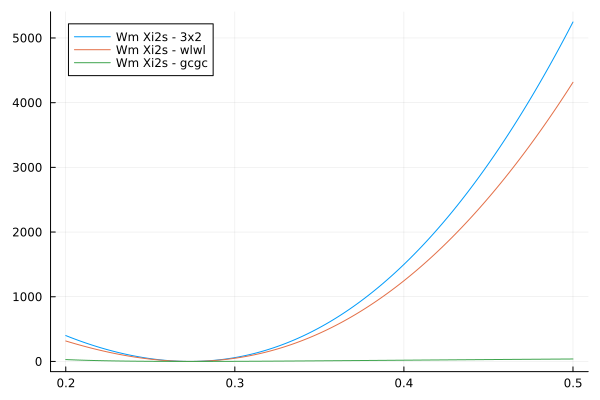

In [20]:
plot(Wm, Wm_xi2_3x2, label="Wm Xi2s - 3x2")
plot!(Wm, Wm_xi2_wlwl, label="Wm Xi2s - wlwl")
plot!(Wm, Wm_xi2_gcgc, label="Wm Xi2s - gcgc")